### Content
The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). 
There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. 
The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. 
In order to account for any grading errors, the evaluation set was also checked by a third expert.

In [1]:
import os
import random
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image, ImageOps, ImageEnhance

In [2]:
database_path = '../../data/raw/base01_chest_xray/'

In [3]:
data = []

for stage in os.listdir(database_path):
    database_stage_path = os.path.join(database_path, stage)
    print(database_stage_path)
    for outcome in os.listdir(database_stage_path):
        folderpath = os.path.join(database_stage_path, outcome)
        print(outcome, len(os.listdir(folderpath)))
        for filename in os.listdir(folderpath):
            filepath = os.path.join(folderpath, filename)
            data.append({"img_filepath": filepath.replace("\\", '/'), "stage": stage, "outcome": outcome})

data = pd.DataFrame(data)
data

../../data/raw/base01_chest_xray/test
NORMAL 234
PNEUMONIA 390
../../data/raw/base01_chest_xray/train
NORMAL 1341
PNEUMONIA 3875
../../data/raw/base01_chest_xray/val
NORMAL 8
PNEUMONIA 8


,img_filepath,stage,outcome
0,../../data/raw/base01_chest_xray/test/NORMAL/I...,test,NORMAL
1,../../data/raw/base01_chest_xray/test/NORMAL/I...,test,NORMAL
2,../../data/raw/base01_chest_xray/test/NORMAL/I...,test,NORMAL
3,../../data/raw/base01_chest_xray/test/NORMAL/I...,test,NORMAL
4,../../data/raw/base01_chest_xray/test/NORMAL/I...,test,NORMAL
...,...,...,...
5851,../../data/raw/base01_chest_xray/val/PNEUMONIA...,val,PNEUMONIA
5852,../../data/raw/base01_chest_xray/val/PNEUMONIA...,val,PNEUMONIA
5853,../../data/raw/base01_chest_xray/val/PNEUMONIA...,val,PNEUMONIA
5854,../../data/raw/base01_chest_xray/val/PNEUMONIA...,val,PNEUMONIA


In [4]:
data.describe().transpose()

,count,unique,top,freq
img_filepath,5856,5856,../../data/raw/base01_chest_xray/test/NORMAL/I...,1
stage,5856,3,train,5216
outcome,5856,2,PNEUMONIA,4273


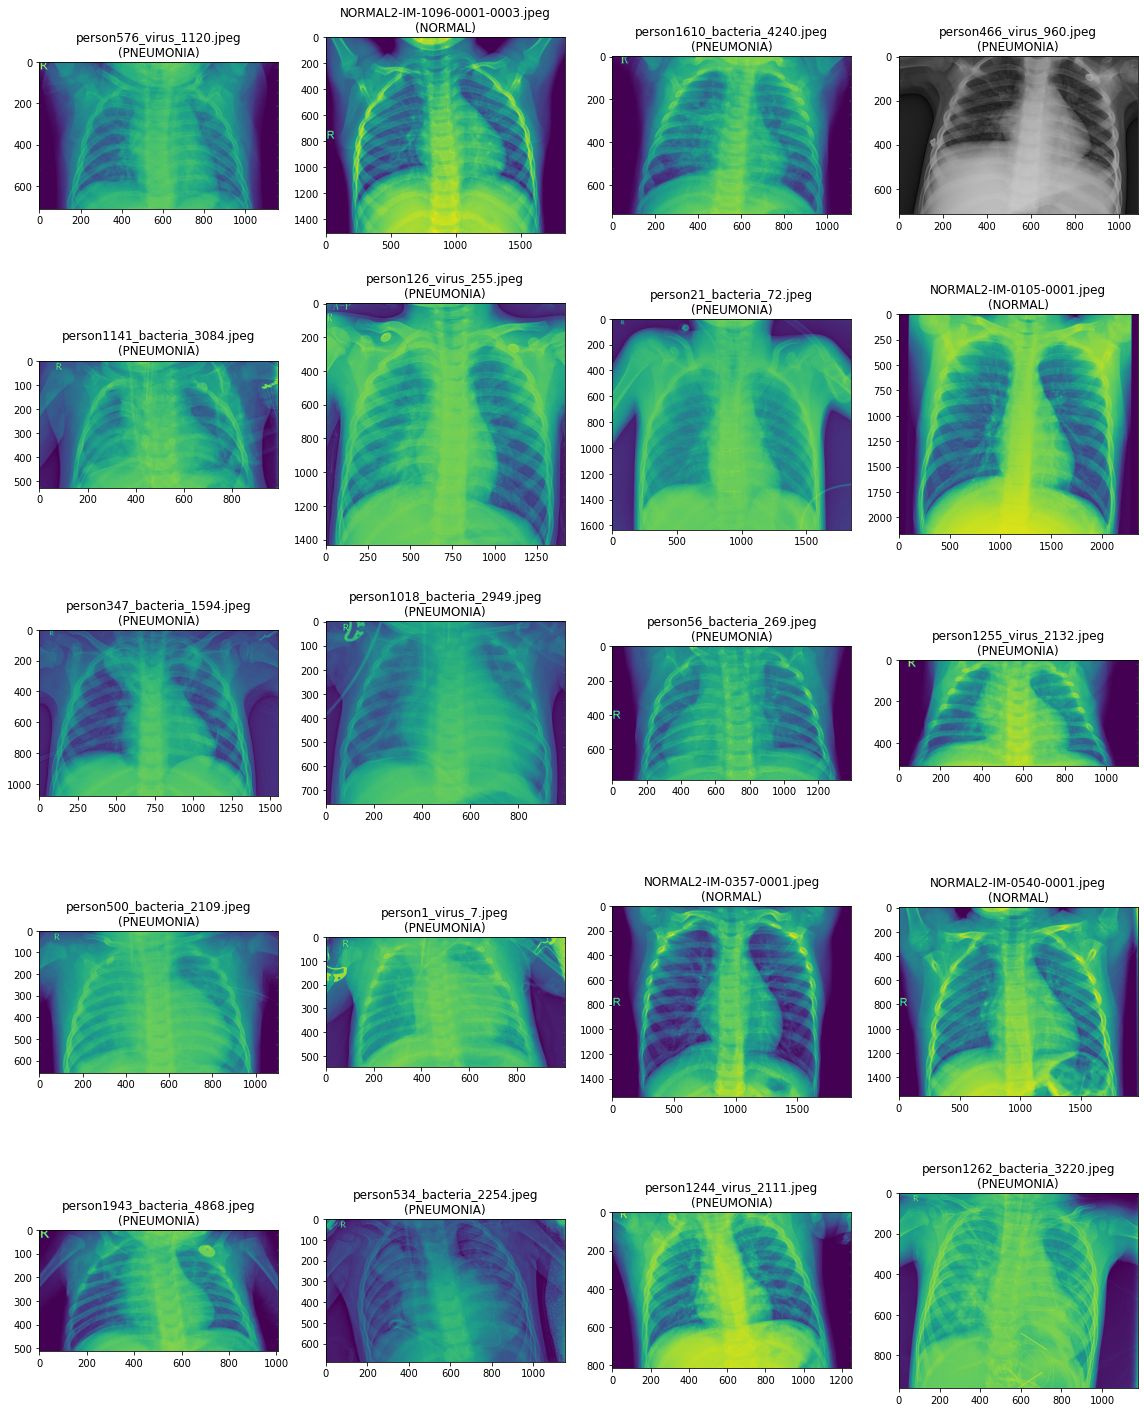

In [5]:
def plot_imgs_from_df(df, filepath_col, y_col, figsize=(16, 20), n_images=20, subplotshape=(5, 4)):
    # Plotting a sample of the original train images:
    plt.figure(figsize=figsize)
    for i in range(n_images):
        df_sample = df.sample()
        filepath = df_sample[filepath_col].values[0]
        image = Image.open(filepath)

        # show the image
        plt.subplot(subplotshape[0], subplotshape[1], i+1)
        plt.title(f"{filepath.split('/')[-1]}\n({df_sample[y_col].values[0]})")
        plt.imshow(image)

    plt.tight_layout()
    plt.show()
    
plot_imgs_from_df(data, filepath_col='img_filepath', y_col='outcome')

In [6]:
# Image size:

# Train imagens size
img_sizes = []
for filepath in data['img_filepath']:
    image = Image.open(filepath)
    img_sizes.append(image.size)

img_sizes = pd.DataFrame(img_sizes, columns=['width', 'height'])
img_sizes.head()

,width,height
0,1857,1317
1,2111,1509
2,2031,1837
3,1663,1326
4,2053,1818


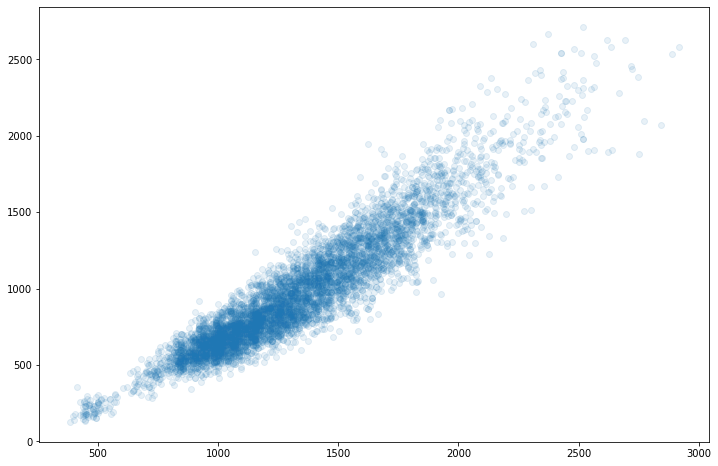

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(img_sizes['width'], img_sizes['height'], alpha=0.1)
plt.show()

### Conclusions

- Base de dados com imagens de diversos tamanhos.
- Total: 5856 imagens rotuladas
- Não cita a existência de diferentes protocolos para a geração das imagens, assumirei que todas seguem o mesmo protocolo.